In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/starbucks_menu_elements.csv",sep=";") # import data from csv file with semicolon as column separator
df # display the data frame

,Food,Calories,Fat [g],Carb [g],Fiber [g],Protein [g]
0,Chonga Bagel,300,5.0,50,3,12
1,Almond Croissant,410,22.0,45,3,10
2,Apple Fritter,460,23.0,56,2,7
3,Banana Nut Bread,420,22.0,52,2,6
4,Blueberry Muffin with Yogurt and Honey,380,16.0,53,1,6
5,Butter Croissant,240,12.0,28,1,5
6,Butterfly Cookie,350,22.0,38,0,2
7,Cheese Danish,320,16.0,36,1,8
8,Chewy Chocolate Cookie,170,5.0,30,2,2
9,Chocolate Chip Cookie,310,15.0,42,2,4


In [3]:
df.describe() # count the basic characteristics of a sample for columns - non-numerical columns will be ommitted

,Calories,Fat [g],Carb [g],Fiber [g],Protein [g]
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,359.047619,15.666667,47.904762,2.285714,7.809524
std,110.222718,7.928325,14.296520,2.077086,5.114871
min,120.000000,1.000000,18.000000,0.000000,2.000000
25%,300.000000,12.000000,38.000000,1.000000,6.000000
50%,380.000000,16.000000,50.000000,2.000000,7.000000
75%,420.000000,22.000000,56.000000,2.000000,9.000000
max,600.000000,25.000000,80.000000,10.000000,23.000000


In [4]:
df[df.columns[1:]].mad() # compute average deviation of all columns except the year

 Calories       85.759637
 Fat [g]         6.380952
 Carb [g]       11.528345
 Fiber [g]       1.197279
 Protein [g]     3.383220
dtype: float64

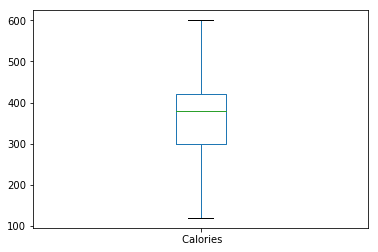

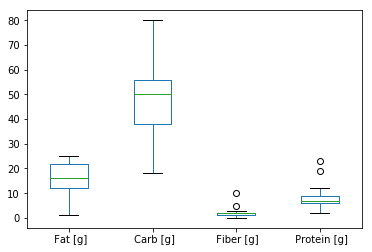

In [5]:
df[df.columns[1]].plot.box() #make a boxplot of calories column
df[df.columns[2:]].plot.box() #make a boxplot of remaining columns

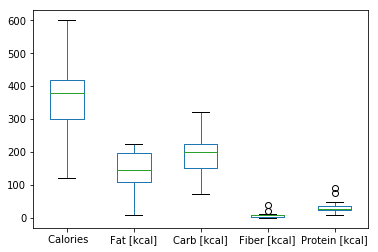

In [6]:
df["Fat [kcal]"] = df[df.columns[2]]*9
df["Carb [kcal]"] = df[df.columns[3]]*4
df["Fiber [kcal]"] = df[df.columns[4]]*4
df["Protein [kcal]"] = df[df.columns[5]]*4

df[df.columns[np.concatenate([[1],list(range(6,10))])]].plot.box() #make a boxplot of calories

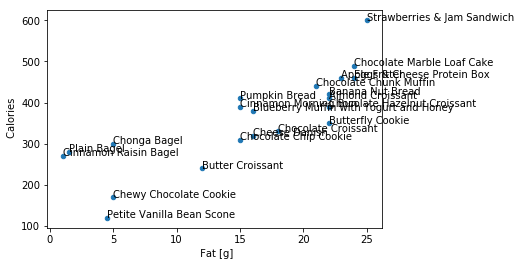

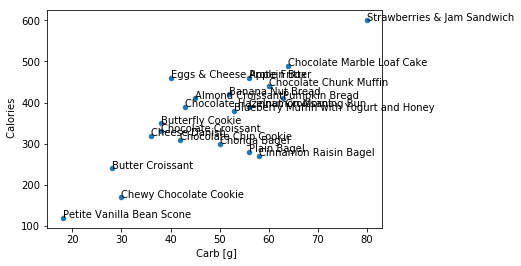

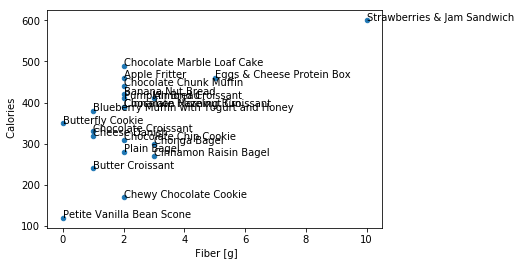

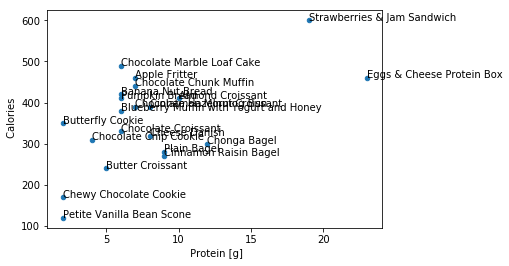

In [7]:
ax = df.plot.scatter(df.columns[2],df.columns[1]) # make a plot
df[[df.columns[2],df.columns[1],df.columns[0]]].apply(lambda x: ax.text(*x),axis=1); #labels

ax = df.plot.scatter(df.columns[3],df.columns[1]) # make a plot
df[[df.columns[3],df.columns[1],df.columns[0]]].apply(lambda x: ax.text(*x),axis=1); #labels

ax = df.plot.scatter(df.columns[4],df.columns[1]) # make a plot
df[[df.columns[4],df.columns[1],df.columns[0]]].apply(lambda x: ax.text(*x),axis=1); #labels

ax = df.plot.scatter(df.columns[5],df.columns[1]) # make a plot
df[[df.columns[5],df.columns[1],df.columns[0]]].apply(lambda x: ax.text(*x),axis=1); #labels

In [8]:
K = df[df.columns[1:6]].corr() # find the correlation matrix
for i in range(5): # remove the duplicate values and replace them with Not a Number symbol
    for j in range(i,5):
        K.loc[K.columns[i],K.columns[j]]=np.NaN
K

,Calories,Fat [g],Carb [g],Fiber [g],Protein [g]
Calories,NaN,NaN,NaN,NaN,NaN
Fat [g],0.817235,NaN,NaN,NaN,NaN
Carb [g],0.770659,0.300551,NaN,NaN,NaN
Fiber [g],0.610572,0.276297,0.603755,NaN,NaN
Protein [g],0.563717,0.275159,0.416151,0.810158,NaN


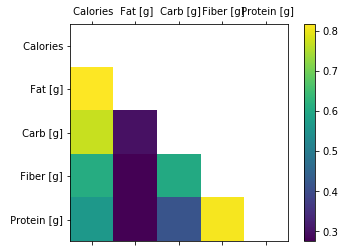

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(K)
fig.colorbar(cax)
ax.set_xticklabels(['']+df.columns[0:6])
ax.set_yticklabels(['']+df.columns[0:6])

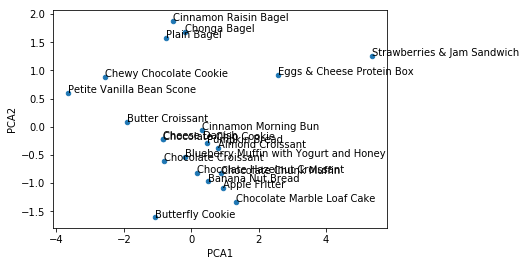

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform( df.loc[:, df.columns[1:6]].values )
pca = PCA(n_components=2)

pca_df = pd.DataFrame(data = pca.fit_transform(x)
             , columns = ['PCA1', 'PCA2'])
pca_df["label"] = df[df.columns[0]]

ax = pca_df.plot.scatter('PCA1', 'PCA2')
pca_df[[pca_df.columns[0],pca_df.columns[1],pca_df.columns[2]]].apply(lambda x: ax.text(*x),axis=1); #labels